# Single A2C

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from Utils import single_A2C_training as A2C_train
from Utils import A3C_training
from Utils import test_env, utils, plot

from AC_modules.Constructor import *
from AC_modules.Networks import *
from AC_modules.AdvantageActorCritic import SharedAC, IndependentAC

from importlib import reload

In [2]:
# Variable parameters
X = 10
Y = 10
initial = [0,0]
goal = [6,7]
MAX_STEPS = 100

# All game parameters
game_params = dict(x=X, y=Y, initial=initial, goal=goal, max_steps=MAX_STEPS, 
                   greyscale_state=False, return_coord=True, R0=0)

In [3]:
name = "CoordinateNet"
action_space = 4
HPs = dict(observation_space = 5, gamma=0.99, tau=0.3, n_steps=20, H=1e-3, n_features=16, hiddens=[64,32])
lr=5e-4
shared_architecture = True

if torch.cuda.is_available():
    HPs['device'] = 'cuda'
else:
    HPs['device'] = 'cpu'
    
print("Using device "+HPs['device'])
    
agent_constructor = ActorCriticConstructor(name, shared_architecture, action_space, **HPs)
agent = agent_constructor.generate_model()

Using device cuda
Model:  <class 'AC_modules.Networks.CoordinateNet'>
self.model:  <class 'AC_modules.Networks.CoordinateNet'>
self.shared:  True
self.args:  (4,)
self.kwargs:  {'observation_space': 5, 'gamma': 0.99, 'tau': 0.3, 'n_steps': 20, 'H': 0.001, 'n_features': 16, 'hiddens': [64, 32], 'device': 'cuda'}


In [4]:
# see if everything works before starting the real training cycle
env = test_env.Sandbox(**game_params)
rewards, log_probs, distributions, states, done, bootstrap = A2C_train.play_episode(agent, env, max_steps=MAX_STEPS)

print("rewards: ", rewards.shape)
print("log_probs: ", len(log_probs))
print("distributions: ", len(distributions))
print("states: ", states.shape)
print("done: ", done.shape)
print("bootstrap: ", bootstrap.shape)

agent.compute_ac_loss(rewards, log_probs, distributions, states, done, bootstrap)

rewards:  (100,)
log_probs:  100
distributions:  100
states:  (101, 5)
done:  (100,)
bootstrap:  (100,)


(tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>),
 tensor(-0.0183, device='cuda:0', grad_fn=<AddBackward0>),
 tensor(-0.3464, device='cuda:0', grad_fn=<MeanBackward0>))

### Training shared architecture

In [5]:
name = "CoordinateNet"
action_space = 4
HPs = dict(observation_space = 5, gamma=0.99, tau=0.3, n_steps=20, H=1e-3, n_features=16, hiddens=[64,32])
lr=5e-4
shared_architecture = True

if torch.cuda.is_available():
    HPs['device'] = 'cuda'
else:
    HPs['device'] = 'cpu'
    
print("Using device "+HPs['device'])
    
agent_constructor = ActorCriticConstructor(name, shared_architecture, action_space, **HPs)
agent = agent_constructor.generate_model()

Using device cuda
Model:  <class 'AC_modules.Networks.CoordinateNet'>
self.model:  <class 'AC_modules.Networks.CoordinateNet'>
self.shared:  True
self.args:  (4,)
self.kwargs:  {'observation_space': 5, 'gamma': 0.99, 'tau': 0.3, 'n_steps': 20, 'H': 0.001, 'n_features': 16, 'hiddens': [64, 32], 'device': 'cuda'}


In [6]:
%%time
results = A2C_train.train_sandbox(agent, game_params, lr, n_episodes = 10000,
                              max_steps=MAX_STEPS, return_agent=True, random_init=True)

Episode 10 - reward: 0.20 - steps to solve: 84.80
Episode 20 - reward: 0.30 - steps to solve: 79.10
Episode 30 - reward: 0.40 - steps to solve: 75.10
Episode 40 - reward: 0.70 - steps to solve: 50.20
Episode 50 - reward: 0.20 - steps to solve: 90.00
Episode 60 - reward: 0.50 - steps to solve: 74.10
Episode 70 - reward: 0.40 - steps to solve: 79.20
Episode 80 - reward: 0.30 - steps to solve: 78.00
Episode 90 - reward: 0.40 - steps to solve: 78.00
Episode 100 - reward: 0.20 - steps to solve: 92.90
Episode 110 - reward: 0.30 - steps to solve: 76.00
Episode 120 - reward: 0.10 - steps to solve: 91.10
Episode 130 - reward: 0.30 - steps to solve: 74.10
Episode 140 - reward: 0.20 - steps to solve: 84.00
Episode 150 - reward: 0.00 - steps to solve: 100.00
Episode 160 - reward: 0.20 - steps to solve: 85.10
Episode 170 - reward: 0.50 - steps to solve: 77.10
Episode 180 - reward: 0.30 - steps to solve: 77.40
Episode 190 - reward: 0.50 - steps to solve: 83.30
Episode 200 - reward: 0.20 - steps to s

Episode 1610 - reward: 0.60 - steps to solve: 63.90
Episode 1620 - reward: 0.50 - steps to solve: 66.10
Episode 1630 - reward: 0.10 - steps to solve: 95.40
Episode 1640 - reward: 0.40 - steps to solve: 73.20
Episode 1650 - reward: 0.40 - steps to solve: 78.80
Episode 1660 - reward: 0.20 - steps to solve: 92.20
Episode 1670 - reward: 0.60 - steps to solve: 61.40
Episode 1680 - reward: 0.40 - steps to solve: 91.30
Episode 1690 - reward: 0.40 - steps to solve: 77.70
Episode 1700 - reward: 0.90 - steps to solve: 52.70
Episode 1710 - reward: 0.50 - steps to solve: 65.20
Episode 1720 - reward: 0.80 - steps to solve: 39.20
Episode 1730 - reward: 0.90 - steps to solve: 54.70
Episode 1740 - reward: 0.40 - steps to solve: 78.30
Episode 1750 - reward: 0.80 - steps to solve: 60.00
Episode 1760 - reward: 0.60 - steps to solve: 69.10
Episode 1770 - reward: 0.80 - steps to solve: 57.50
Episode 1780 - reward: 0.80 - steps to solve: 59.90
Episode 1790 - reward: 0.70 - steps to solve: 65.10
Episode 1800

Episode 3190 - reward: 1.00 - steps to solve: 12.20
Episode 3200 - reward: 1.00 - steps to solve: 8.80
Episode 3210 - reward: 1.00 - steps to solve: 12.90
Episode 3220 - reward: 1.00 - steps to solve: 8.20
Episode 3230 - reward: 1.00 - steps to solve: 11.70
Episode 3240 - reward: 1.00 - steps to solve: 10.00
Episode 3250 - reward: 1.00 - steps to solve: 7.40
Episode 3260 - reward: 1.00 - steps to solve: 6.20
Episode 3270 - reward: 1.00 - steps to solve: 11.50
Episode 3280 - reward: 1.00 - steps to solve: 10.30
Episode 3290 - reward: 1.00 - steps to solve: 9.50
Episode 3300 - reward: 1.00 - steps to solve: 10.10
Episode 3310 - reward: 1.00 - steps to solve: 9.80
Episode 3320 - reward: 1.00 - steps to solve: 6.80
Episode 3330 - reward: 1.00 - steps to solve: 7.70
Episode 3340 - reward: 1.00 - steps to solve: 9.70
Episode 3350 - reward: 1.00 - steps to solve: 10.20
Episode 3360 - reward: 1.00 - steps to solve: 8.20
Episode 3370 - reward: 1.00 - steps to solve: 9.40
Episode 3380 - reward: 

Episode 4800 - reward: 1.00 - steps to solve: 6.80
Episode 4810 - reward: 1.00 - steps to solve: 5.60
Episode 4820 - reward: 1.00 - steps to solve: 8.40
Episode 4830 - reward: 1.00 - steps to solve: 7.40
Episode 4840 - reward: 1.00 - steps to solve: 7.40
Episode 4850 - reward: 1.00 - steps to solve: 7.20
Episode 4860 - reward: 1.00 - steps to solve: 7.50
Episode 4870 - reward: 1.00 - steps to solve: 4.60
Episode 4880 - reward: 1.00 - steps to solve: 7.70
Episode 4890 - reward: 1.00 - steps to solve: 6.90
Episode 4900 - reward: 1.00 - steps to solve: 7.60
Episode 4910 - reward: 1.00 - steps to solve: 9.30
Episode 4920 - reward: 1.00 - steps to solve: 7.80
Episode 4930 - reward: 1.00 - steps to solve: 6.50
Episode 4940 - reward: 1.00 - steps to solve: 8.90
Episode 4950 - reward: 1.00 - steps to solve: 5.70
Episode 4960 - reward: 1.00 - steps to solve: 7.20
Episode 4970 - reward: 1.00 - steps to solve: 7.20
Episode 4980 - reward: 1.00 - steps to solve: 7.90
Episode 4990 - reward: 1.00 - s

Episode 6410 - reward: 1.00 - steps to solve: 7.40
Episode 6420 - reward: 1.00 - steps to solve: 8.00
Episode 6430 - reward: 1.00 - steps to solve: 6.10
Episode 6440 - reward: 1.00 - steps to solve: 7.60
Episode 6450 - reward: 1.00 - steps to solve: 8.10
Episode 6460 - reward: 1.00 - steps to solve: 8.10
Episode 6470 - reward: 1.00 - steps to solve: 6.90
Episode 6480 - reward: 1.00 - steps to solve: 6.40
Episode 6490 - reward: 1.00 - steps to solve: 6.10
Episode 6500 - reward: 1.00 - steps to solve: 7.00
Episode 6510 - reward: 1.00 - steps to solve: 7.50
Episode 6520 - reward: 1.00 - steps to solve: 4.60
Episode 6530 - reward: 1.00 - steps to solve: 6.20
Episode 6540 - reward: 1.00 - steps to solve: 5.70
Episode 6550 - reward: 1.00 - steps to solve: 5.50
Episode 6560 - reward: 1.00 - steps to solve: 7.30
Episode 6570 - reward: 1.00 - steps to solve: 7.20
Episode 6580 - reward: 1.00 - steps to solve: 6.90
Episode 6590 - reward: 1.00 - steps to solve: 6.50
Episode 6600 - reward: 1.00 - s

Episode 8020 - reward: 1.00 - steps to solve: 8.00
Episode 8030 - reward: 1.00 - steps to solve: 7.10
Episode 8040 - reward: 1.00 - steps to solve: 5.80
Episode 8050 - reward: 1.00 - steps to solve: 7.70
Episode 8060 - reward: 1.00 - steps to solve: 5.20
Episode 8070 - reward: 1.00 - steps to solve: 6.30
Episode 8080 - reward: 1.00 - steps to solve: 6.50
Episode 8090 - reward: 1.00 - steps to solve: 7.30
Episode 8100 - reward: 1.00 - steps to solve: 7.70
Episode 8110 - reward: 1.00 - steps to solve: 5.50
Episode 8120 - reward: 1.00 - steps to solve: 9.90
Episode 8130 - reward: 1.00 - steps to solve: 7.10
Episode 8140 - reward: 1.00 - steps to solve: 7.40
Episode 8150 - reward: 1.00 - steps to solve: 6.20
Episode 8160 - reward: 1.00 - steps to solve: 8.30
Episode 8170 - reward: 1.00 - steps to solve: 5.90
Episode 8180 - reward: 1.00 - steps to solve: 6.60
Episode 8190 - reward: 1.00 - steps to solve: 6.30
Episode 8200 - reward: 1.00 - steps to solve: 5.30
Episode 8210 - reward: 1.00 - s

Episode 9620 - reward: 1.00 - steps to solve: 7.80
Episode 9630 - reward: 1.00 - steps to solve: 9.80
Episode 9640 - reward: 1.00 - steps to solve: 7.40
Episode 9650 - reward: 1.00 - steps to solve: 8.40
Episode 9660 - reward: 1.00 - steps to solve: 7.30
Episode 9670 - reward: 1.00 - steps to solve: 7.80
Episode 9680 - reward: 1.00 - steps to solve: 7.90
Episode 9690 - reward: 1.00 - steps to solve: 7.30
Episode 9700 - reward: 1.00 - steps to solve: 5.50
Episode 9710 - reward: 1.00 - steps to solve: 8.80
Episode 9720 - reward: 1.00 - steps to solve: 6.20
Episode 9730 - reward: 1.00 - steps to solve: 6.20
Episode 9740 - reward: 1.00 - steps to solve: 6.80
Episode 9750 - reward: 1.00 - steps to solve: 7.00
Episode 9760 - reward: 1.00 - steps to solve: 7.40
Episode 9770 - reward: 1.00 - steps to solve: 7.60
Episode 9780 - reward: 1.00 - steps to solve: 5.50
Episode 9790 - reward: 1.00 - steps to solve: 6.50
Episode 9800 - reward: 1.00 - steps to solve: 7.10
Episode 9810 - reward: 1.00 - s

In [7]:
shared_results = results

In [8]:
score, asymptotic_score, asymptotic_std, trained_agent, time_profile, losses, steps_to_solve = shared_results

In [9]:
save = True
keywords = [ 'coord','10by10', 'shared-v1' ,str(len(score))+"-episodes",str(MAX_STEPS)+"-steps"] # example

if save:
    save_dir = 'Results/Sandbox/'
    ID = utils.save_session(save_dir, keywords, game_params, HPs, score, steps_to_solve, losses)
    torch.save(trained_agent, save_dir+"agent_"+ID)
else:
    print("Nothing saved")
    pass

Save at Results/Sandbox/S_coord_10by10_shared-v1_10000-episodes_100-steps_EFAU


/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type SharedAC. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type SharedActorCritic. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type CoordinateNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + 

Average time for playing one episode: 0.01 s
Average time for updating the agent: 0.02 s
Asymptotic score: 0.769 +/- 0.422


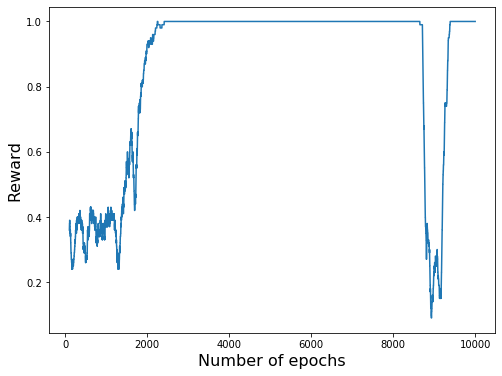

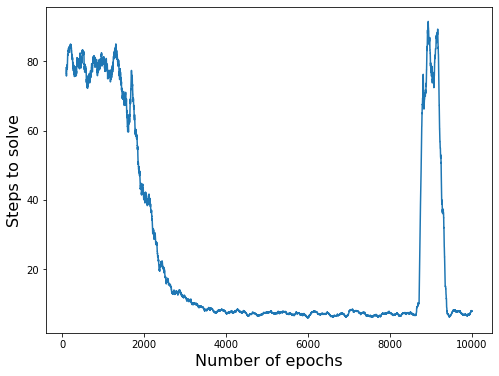

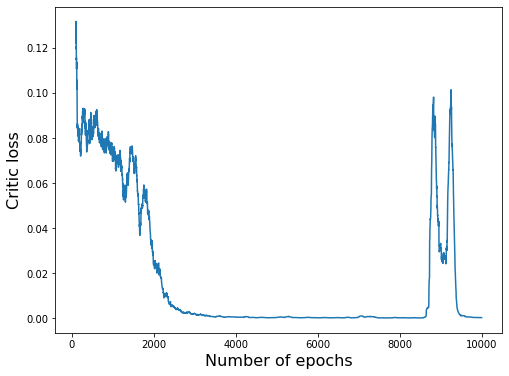

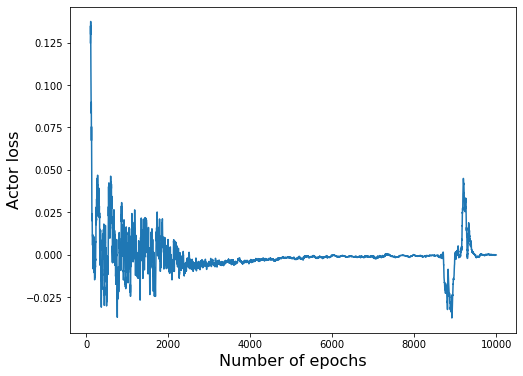

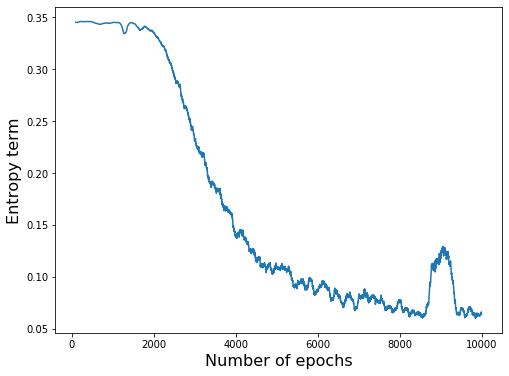

In [10]:
plot.plot_results(shared_results, moving_average=True)

### Training independent architecture

In [11]:
name = "CoordinateNet"
action_space = 4
HPs = dict(observation_space = 5, gamma=0.99, tau=0.3, n_steps=20, twin=False, 
           H=1e-3, n_features=16, hiddens=[64,32])
lr=5e-4
shared_architecture = False

if torch.cuda.is_available():
    HPs['device'] = 'cuda'
else:
    HPs['device'] = 'cpu'
    
print("Using device "+HPs['device'])
    
agent_constructor = ActorCriticConstructor(name, shared_architecture, action_space, **HPs)
agent = agent_constructor.generate_model()

Using device cuda
Model:  <class 'AC_modules.Networks.CoordinateNet'>
self.model:  <class 'AC_modules.Networks.CoordinateNet'>
self.shared:  False
self.args:  (4,)
self.kwargs:  {'observation_space': 5, 'gamma': 0.99, 'tau': 0.3, 'n_steps': 20, 'twin': False, 'H': 0.001, 'n_features': 16, 'hiddens': [64, 32], 'device': 'cuda'}


In [12]:
%%time
independent_results = A2C_train.train_sandbox(agent, game_params, lr, n_episodes = 10000,
                              max_steps=MAX_STEPS, return_agent=True, random_init=True)

Episode 10 - reward: 0.70 - steps to solve: 63.80
Episode 20 - reward: 0.20 - steps to solve: 89.70
Episode 30 - reward: 0.40 - steps to solve: 81.50
Episode 40 - reward: 0.40 - steps to solve: 88.00
Episode 50 - reward: 0.60 - steps to solve: 69.70
Episode 60 - reward: 0.10 - steps to solve: 91.70
Episode 70 - reward: 0.40 - steps to solve: 69.40
Episode 80 - reward: 0.20 - steps to solve: 93.20
Episode 90 - reward: 0.30 - steps to solve: 75.10
Episode 100 - reward: 0.50 - steps to solve: 80.90
Episode 110 - reward: 0.40 - steps to solve: 74.30
Episode 120 - reward: 0.20 - steps to solve: 86.90
Episode 130 - reward: 0.30 - steps to solve: 79.60
Episode 140 - reward: 0.50 - steps to solve: 77.20
Episode 150 - reward: 0.50 - steps to solve: 64.70
Episode 160 - reward: 0.20 - steps to solve: 82.50
Episode 170 - reward: 0.40 - steps to solve: 78.20
Episode 180 - reward: 0.10 - steps to solve: 91.50
Episode 190 - reward: 0.30 - steps to solve: 86.80
Episode 200 - reward: 0.20 - steps to so

Episode 1610 - reward: 1.00 - steps to solve: 28.00
Episode 1620 - reward: 0.90 - steps to solve: 35.10
Episode 1630 - reward: 1.00 - steps to solve: 28.20
Episode 1640 - reward: 1.00 - steps to solve: 23.90
Episode 1650 - reward: 1.00 - steps to solve: 21.20
Episode 1660 - reward: 1.00 - steps to solve: 27.80
Episode 1670 - reward: 1.00 - steps to solve: 28.20
Episode 1680 - reward: 1.00 - steps to solve: 27.20
Episode 1690 - reward: 1.00 - steps to solve: 33.60
Episode 1700 - reward: 1.00 - steps to solve: 17.40
Episode 1710 - reward: 1.00 - steps to solve: 19.50
Episode 1720 - reward: 1.00 - steps to solve: 21.30
Episode 1730 - reward: 1.00 - steps to solve: 30.30
Episode 1740 - reward: 1.00 - steps to solve: 32.00
Episode 1750 - reward: 1.00 - steps to solve: 18.00
Episode 1760 - reward: 1.00 - steps to solve: 22.00
Episode 1770 - reward: 0.90 - steps to solve: 30.20
Episode 1780 - reward: 1.00 - steps to solve: 18.30
Episode 1790 - reward: 1.00 - steps to solve: 18.70
Episode 1800

Episode 3210 - reward: 1.00 - steps to solve: 7.60
Episode 3220 - reward: 1.00 - steps to solve: 7.40
Episode 3230 - reward: 1.00 - steps to solve: 6.80
Episode 3240 - reward: 1.00 - steps to solve: 9.30
Episode 3250 - reward: 1.00 - steps to solve: 6.00
Episode 3260 - reward: 1.00 - steps to solve: 8.60
Episode 3270 - reward: 1.00 - steps to solve: 7.00
Episode 3280 - reward: 1.00 - steps to solve: 6.30
Episode 3290 - reward: 1.00 - steps to solve: 7.40
Episode 3300 - reward: 1.00 - steps to solve: 9.10
Episode 3310 - reward: 1.00 - steps to solve: 8.00
Episode 3320 - reward: 1.00 - steps to solve: 4.90
Episode 3330 - reward: 1.00 - steps to solve: 5.30
Episode 3340 - reward: 1.00 - steps to solve: 7.90
Episode 3350 - reward: 1.00 - steps to solve: 7.60
Episode 3360 - reward: 1.00 - steps to solve: 9.60
Episode 3370 - reward: 1.00 - steps to solve: 7.90
Episode 3380 - reward: 1.00 - steps to solve: 8.70
Episode 3390 - reward: 1.00 - steps to solve: 7.60
Episode 3400 - reward: 1.00 - s

Episode 4820 - reward: 1.00 - steps to solve: 6.60
Episode 4830 - reward: 1.00 - steps to solve: 5.10
Episode 4840 - reward: 1.00 - steps to solve: 6.30
Episode 4850 - reward: 1.00 - steps to solve: 7.30
Episode 4860 - reward: 1.00 - steps to solve: 6.90
Episode 4870 - reward: 1.00 - steps to solve: 7.10
Episode 4880 - reward: 1.00 - steps to solve: 7.00
Episode 4890 - reward: 1.00 - steps to solve: 7.50
Episode 4900 - reward: 1.00 - steps to solve: 5.70
Episode 4910 - reward: 1.00 - steps to solve: 6.10
Episode 4920 - reward: 1.00 - steps to solve: 7.60
Episode 4930 - reward: 1.00 - steps to solve: 6.00
Episode 4940 - reward: 1.00 - steps to solve: 7.80
Episode 4950 - reward: 1.00 - steps to solve: 7.70
Episode 4960 - reward: 1.00 - steps to solve: 7.20
Episode 4970 - reward: 1.00 - steps to solve: 7.00
Episode 4980 - reward: 1.00 - steps to solve: 7.00
Episode 4990 - reward: 1.00 - steps to solve: 8.60
Episode 5000 - reward: 1.00 - steps to solve: 7.40
Episode 5010 - reward: 1.00 - s

Episode 6420 - reward: 0.00 - steps to solve: 100.00
Episode 6430 - reward: 0.00 - steps to solve: 100.00
Episode 6440 - reward: 0.00 - steps to solve: 100.00
Episode 6450 - reward: 0.00 - steps to solve: 100.00
Episode 6460 - reward: 0.00 - steps to solve: 100.00
Episode 6470 - reward: 0.00 - steps to solve: 100.00
Episode 6480 - reward: 0.00 - steps to solve: 100.00
Episode 6490 - reward: 0.00 - steps to solve: 100.00
Episode 6500 - reward: 0.20 - steps to solve: 81.40
Episode 6510 - reward: 0.00 - steps to solve: 100.00
Episode 6520 - reward: 0.10 - steps to solve: 90.20
Episode 6530 - reward: 0.40 - steps to solve: 61.50
Episode 6540 - reward: 0.00 - steps to solve: 100.00
Episode 6550 - reward: 0.10 - steps to solve: 97.10
Episode 6560 - reward: 0.00 - steps to solve: 100.00
Episode 6570 - reward: 0.10 - steps to solve: 90.30
Episode 6580 - reward: 0.30 - steps to solve: 85.00
Episode 6590 - reward: 0.00 - steps to solve: 100.00
Episode 6600 - reward: 0.10 - steps to solve: 97.70


Episode 8000 - reward: 1.00 - steps to solve: 7.70
Episode 8010 - reward: 1.00 - steps to solve: 8.40
Episode 8020 - reward: 1.00 - steps to solve: 8.40
Episode 8030 - reward: 1.00 - steps to solve: 8.20
Episode 8040 - reward: 1.00 - steps to solve: 7.60
Episode 8050 - reward: 1.00 - steps to solve: 7.70
Episode 8060 - reward: 1.00 - steps to solve: 7.80
Episode 8070 - reward: 1.00 - steps to solve: 7.90
Episode 8080 - reward: 1.00 - steps to solve: 5.60
Episode 8090 - reward: 1.00 - steps to solve: 5.70
Episode 8100 - reward: 1.00 - steps to solve: 7.10
Episode 8110 - reward: 1.00 - steps to solve: 10.00
Episode 8120 - reward: 1.00 - steps to solve: 8.70
Episode 8130 - reward: 1.00 - steps to solve: 7.80
Episode 8140 - reward: 1.00 - steps to solve: 6.90
Episode 8150 - reward: 1.00 - steps to solve: 6.40
Episode 8160 - reward: 1.00 - steps to solve: 9.00
Episode 8170 - reward: 1.00 - steps to solve: 9.70
Episode 8180 - reward: 1.00 - steps to solve: 7.90
Episode 8190 - reward: 1.00 - 

Episode 9610 - reward: 1.00 - steps to solve: 7.20
Episode 9620 - reward: 1.00 - steps to solve: 8.30
Episode 9630 - reward: 1.00 - steps to solve: 5.70
Episode 9640 - reward: 1.00 - steps to solve: 5.60
Episode 9650 - reward: 1.00 - steps to solve: 6.60
Episode 9660 - reward: 1.00 - steps to solve: 7.60
Episode 9670 - reward: 1.00 - steps to solve: 10.80
Episode 9680 - reward: 1.00 - steps to solve: 6.40
Episode 9690 - reward: 1.00 - steps to solve: 5.90
Episode 9700 - reward: 1.00 - steps to solve: 7.00
Episode 9710 - reward: 1.00 - steps to solve: 5.70
Episode 9720 - reward: 1.00 - steps to solve: 6.70
Episode 9730 - reward: 1.00 - steps to solve: 6.30
Episode 9740 - reward: 1.00 - steps to solve: 6.40
Episode 9750 - reward: 1.00 - steps to solve: 6.50
Episode 9760 - reward: 1.00 - steps to solve: 5.80
Episode 9770 - reward: 1.00 - steps to solve: 6.90
Episode 9780 - reward: 1.00 - steps to solve: 7.60
Episode 9790 - reward: 1.00 - steps to solve: 4.60
Episode 9800 - reward: 1.00 - 

In [13]:
score, asymptotic_score, asymptotic_std, trained_agent, time_profile, losses, steps_to_solve = independent_results

In [14]:
save = True
keywords = [ 'coord','10by10', 'independent-v1' ,str(len(score))+"-episodes",str(MAX_STEPS)+"-steps"] # example

if save:
    save_dir = 'Results/Sandbox/'
    ID = utils.save_session(save_dir, keywords, game_params, HPs, score, steps_to_solve, losses)
    torch.save(trained_agent, save_dir+"agent_"+ID)
else:
    print("Nothing saved")
    pass

Save at Results/Sandbox/S_coord_10by10_independent-v1_10000-episodes_100-steps_XPIL


/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type IndependentAC. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Actor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won'

Average time for playing one episode: 0.02 s
Average time for updating the agent: 0.02 s
Asymptotic score: 1.000 +/- 0.000


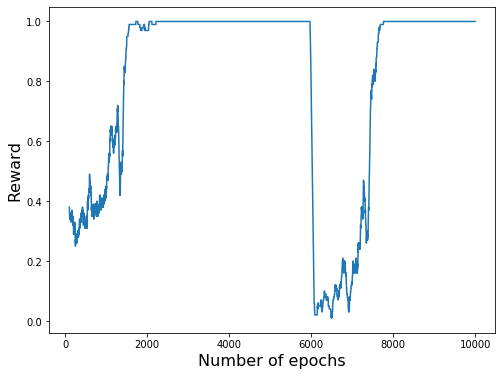

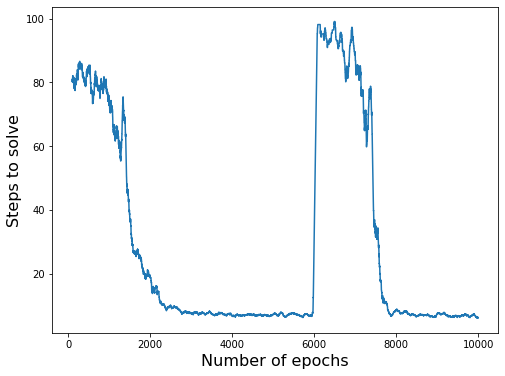

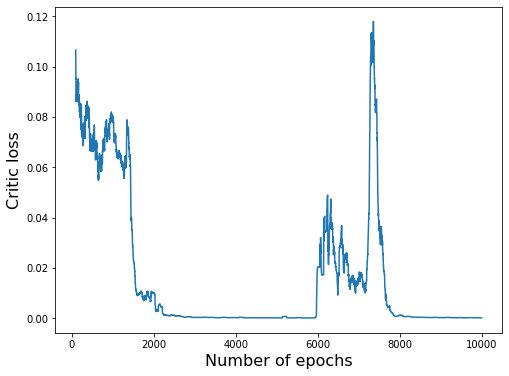

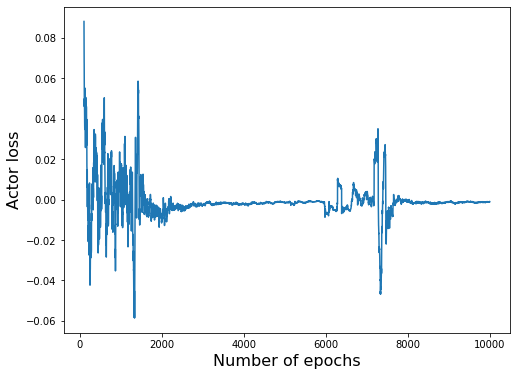

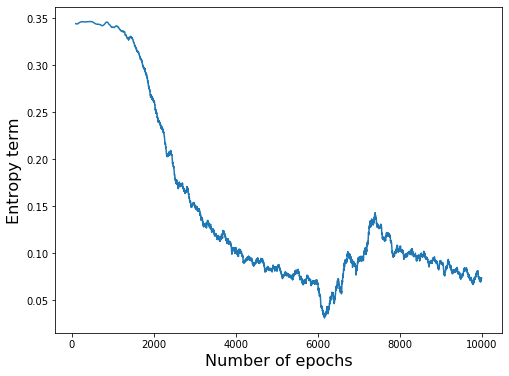

In [15]:
plot.plot_results(independent_results, moving_average=True)

Independent architecture is far superior to the shared one.

Average time (1) for playing one episode: 0.01 s
Average time (1) for updating the agent: 0.02 s
Asymptotic score (1): 0.769 +/- 0.422
Average time (2) for playing one episode: 0.02 s
Average time (2) for updating the agent: 0.02 s
Asymptotic score (2): 1.000 +/- 0.000


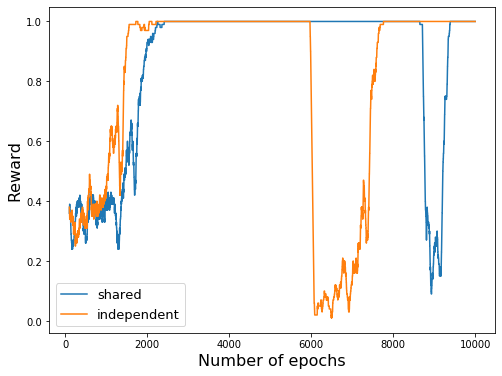

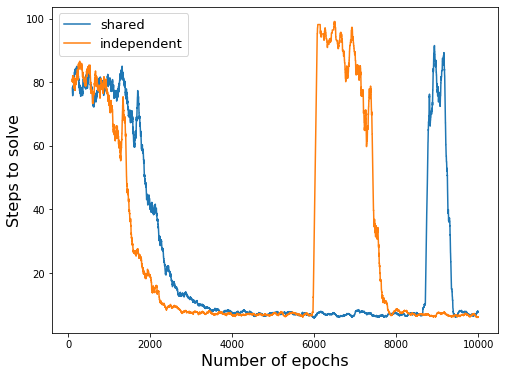

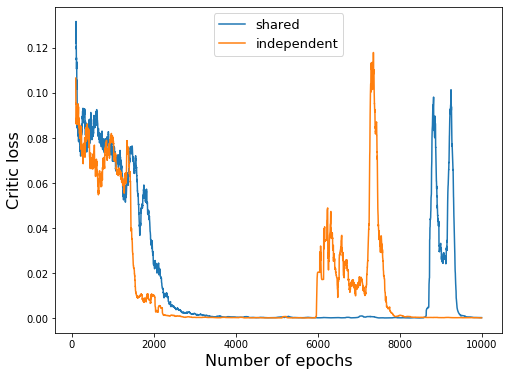

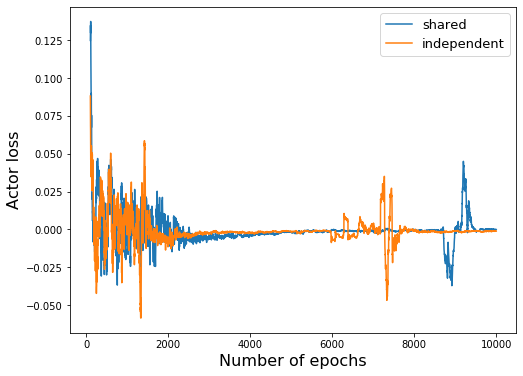

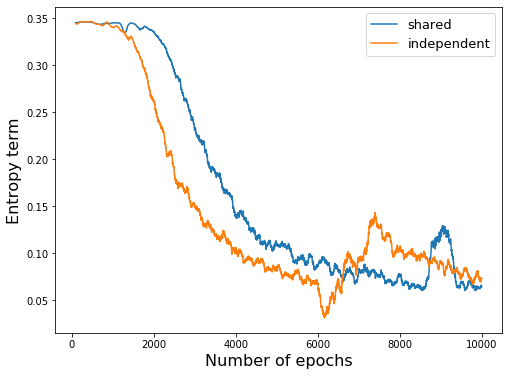

In [16]:
plot.compare_results(shared_results, independent_results, "shared", "independent")

# A3C 
### Independent architecture 

In [2]:
# Variable parameters
X = 10
Y = 10
initial = [0,0]
goal = [6,7]
MAX_STEPS = 100

# All game parameters
game_params = dict(x=X, y=Y, initial=initial, goal=goal, max_steps=MAX_STEPS, 
                   greyscale_state=False, return_coord=True, R0=0)

In [3]:
name = "CoordinateNet"
action_space = 4
HPs = dict(observation_space = 5, gamma=0.99, tau=0.3, n_steps=20, twin=False, 
           H=1e-3, n_features=16, hiddens=[64,32])
lr=5e-4
shared_architecture = False

HPs['device'] = 'cpu'    
print("Using device "+HPs['device'])
    
agent_constructor = ActorCriticConstructor(name, shared_architecture, action_space, **HPs)

Using device cpu
Model:  <class 'AC_modules.Networks.CoordinateNet'>
self.model:  <class 'AC_modules.Networks.CoordinateNet'>
self.shared:  False
self.args:  (4,)
self.kwargs:  {'observation_space': 5, 'gamma': 0.99, 'tau': 0.3, 'n_steps': 20, 'twin': False, 'H': 0.001, 'n_features': 16, 'hiddens': [64, 32], 'device': 'cpu'}


In [4]:
%%time
results = A3C_training.train_sandbox(agent_constructor, lr, game_params, n_training_threads=11, n_episodes=500,
                  max_steps=MAX_STEPS, return_agent=True, random_init=True)

Test process started
max_tests:  539
optim_steps:  0
test counter:  1
Process 1 started
optim_steps:  0
test counter:  1
Process 2 started
optim_steps:  0
Process 3 started
Process 4 started
test counter:  1
Process 5 started
optim_steps:  0
Process 6 started
Process 7 started
test counter:  1
Process 8 started
optim_steps:  1
test counter:  1
Process 10 started
Process 9 started
optim_steps:  2
Process 11 started
test counter:  1
optim_steps:  2
test counter:  1
optim_steps:  8
test counter:  1
Test 2 - reward 0.00 - steps to solve 100.00
optim_steps:  19
test counter:  2
optim_steps:  23
test counter:  2
Test 3 - reward 0.50 - steps to solve 51.00
optim_steps:  25
test counter:  3
optim_steps:  26
test counter:  3
optim_steps:  29
test counter:  3
optim_steps:  33
test counter:  3
All processes started
Test 4 - reward 0.33 - steps to solve 67.33
optim_steps:  41
test counter:  4
Test 5 - reward 0.25 - steps to solve 75.50
optim_steps:  50
test counter:  5
Test 6 - reward 0.40 - steps

Test 78 - reward 0.30 - steps to solve 80.70
optim_steps:  780
test counter:  78
optim_steps:  783
test counter:  78
Test 79 - reward 0.30 - steps to solve 80.70
optim_steps:  792
test counter:  79
optim_steps:  799
test counter:  80
optim_steps:  803
test counter:  80
Test 81 - reward 0.30 - steps to solve 78.00
optim_steps:  807
test counter:  81
optim_steps:  810
test counter:  81
Test 82 - reward 0.30 - steps to solve 78.00
optim_steps:  818
test counter:  82
Test 83 - reward 0.30 - steps to solve 78.00
optim_steps:  826
test counter:  83
optim_steps:  831
test counter:  83
Test 84 - reward 0.30 - steps to solve 78.40
optim_steps:  834
test counter:  84
optim_steps:  839
test counter:  84
optim_steps:  840
test counter:  84
Test 85 - reward 0.30 - steps to solve 78.40
optim_steps:  848
test counter:  85
optim_steps:  852
test counter:  85
Test 86 - reward 0.30 - steps to solve 78.40
optim_steps:  862
test counter:  86
Test 87 - reward 0.20 - steps to solve 84.00
optim_steps:  873
t

optim_steps:  1579
test counter:  158
optim_steps:  1581
test counter:  158
Test 159 - reward 0.70 - steps to solve 61.00
optim_steps:  1584
test counter:  159
optim_steps:  1589
test counter:  159
optim_steps:  1591
test counter:  159
optim_steps:  1598
test counter:  160
Test 161 - reward 0.50 - steps to solve 69.00
optim_steps:  1607
test counter:  161
optim_steps:  1612
test counter:  161
Test 162 - reward 0.50 - steps to solve 71.30
optim_steps:  1619
test counter:  162
Test 163 - reward 0.50 - steps to solve 71.30
optim_steps:  1632
test counter:  163
Test 164 - reward 0.50 - steps to solve 71.30
optim_steps:  1641
test counter:  164
Test 165 - reward 0.50 - steps to solve 72.70
optim_steps:  1645
test counter:  165
optim_steps:  1649
test counter:  165
optim_steps:  1654
test counter:  165
Test 166 - reward 0.40 - steps to solve 75.40
optim_steps:  1662
test counter:  166
Test 167 - reward 0.50 - steps to solve 66.30
optim_steps:  1665
test counter:  167
optim_steps:  1668
test 

test counter:  239
optim_steps:  2397
test counter:  240
optim_steps:  2404
test counter:  240
Test 241 - reward 1.00 - steps to solve 57.00
optim_steps:  2415
test counter:  241
Test 242 - reward 1.00 - steps to solve 56.20
optim_steps:  2423
test counter:  242
Test 243 - reward 1.00 - steps to solve 56.90
optim_steps:  2433
test counter:  243
Test 244 - reward 1.00 - steps to solve 57.60
optim_steps:  2439
test counter:  244
Test 245 - reward 1.00 - steps to solve 59.50
optim_steps:  2448
test counter:  245
Test 246 - reward 0.90 - steps to solve 68.10
optim_steps:  2464
test counter:  246
Test 247 - reward 0.90 - steps to solve 60.00
optim_steps:  2467
test counter:  247
optim_steps:  2471
test counter:  247
Test 248 - reward 0.90 - steps to solve 55.30
optim_steps:  2475
test counter:  248
optim_steps:  2480
test counter:  248
Test 249 - reward 0.90 - steps to solve 58.00
optim_steps:  2492
test counter:  249
optim_steps:  2497
test counter:  250
optim_steps:  2504
test counter:  2

optim_steps:  3369
test counter:  336
Test 337 - reward 1.00 - steps to solve 29.40
optim_steps:  3379
test counter:  337
Test 338 - reward 1.00 - steps to solve 29.10
optim_steps:  3387
test counter:  338
Test 339 - reward 1.00 - steps to solve 25.90
optim_steps:  3398
test counter:  339
optim_steps:  3408
test counter:  340
Test 341 - reward 1.00 - steps to solve 22.50
optim_steps:  3423
test counter:  341
Test 342 - reward 1.00 - steps to solve 22.40
optim_steps:  3433
test counter:  342
Test 343 - reward 1.00 - steps to solve 22.50
optim_steps:  3440
test counter:  343
Test 344 - reward 1.00 - steps to solve 19.90
optim_steps:  3448
test counter:  344
Test 345 - reward 1.00 - steps to solve 18.20
optim_steps:  3456
test counter:  345
Test 346 - reward 1.00 - steps to solve 17.60
optim_steps:  3461
test counter:  346
Test 347 - reward 1.00 - steps to solve 14.60
optim_steps:  3470
test counter:  347
Test 348 - reward 0.90 - steps to solve 23.30
optim_steps:  3496
test counter:  348


test counter:  439
optim_steps:  4607
test counter:  440
Test 441 - reward 1.00 - steps to solve 12.60
optim_steps:  4615
test counter:  441
Test 442 - reward 1.00 - steps to solve 13.90
optim_steps:  4633
test counter:  442
Test 443 - reward 1.00 - steps to solve 13.30
optim_steps:  4647
test counter:  443
Test 444 - reward 1.00 - steps to solve 12.30
optim_steps:  4661
test counter:  444
Test 445 - reward 1.00 - steps to solve 12.10
optim_steps:  4674
test counter:  445
Test 446 - reward 1.00 - steps to solve 12.20
optim_steps:  4688
test counter:  446
Test 447 - reward 1.00 - steps to solve 10.30
optim_steps:  4702
test counter:  447
Test 448 - reward 1.00 - steps to solve 10.50
optim_steps:  4717
test counter:  448
Test 449 - reward 1.00 - steps to solve 11.30
optim_steps:  4731
test counter:  449
optim_steps:  4741
test counter:  450
Test 451 - reward 1.00 - steps to solve 11.30
optim_steps:  4754
test counter:  451
Test 452 - reward 1.00 - steps to solve 10.90
optim_steps:  4771


optim_steps:  5463
test counter:  538
Test 539 - reward 1.00 - steps to solve 9.90
Putting results in queue
performance (put) 
Training process 6 reached maximum episode.
steps_to_solve (put)
critic_losses (put)
actor_losses (put) 
entropies (put)
performance (get)
steps_to_solve (get)
critic_losses (get)
actor_losses (get)
entropies (get)
All processes finished
CPU times: user 795 ms, sys: 413 ms, total: 1.21 s
Wall time: 16 s


In [5]:
score, global_model, losses, steps_to_solve = results

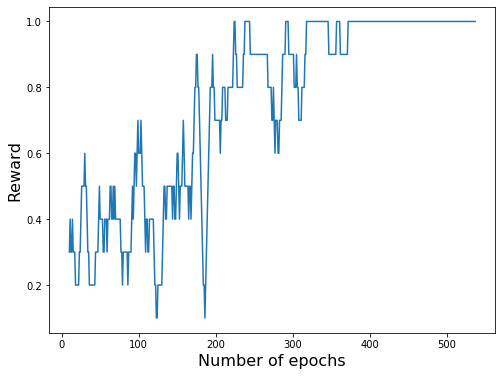

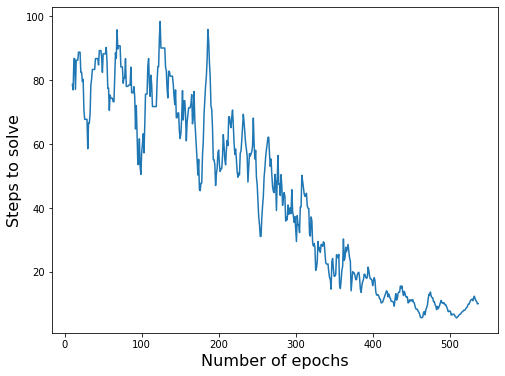

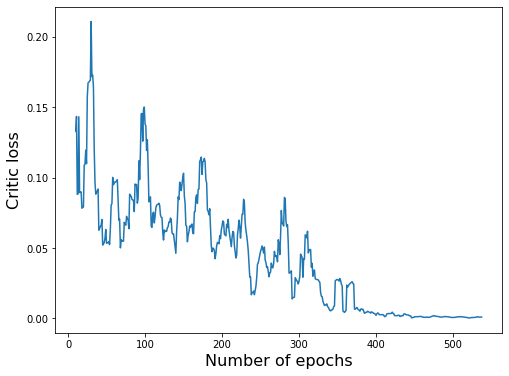

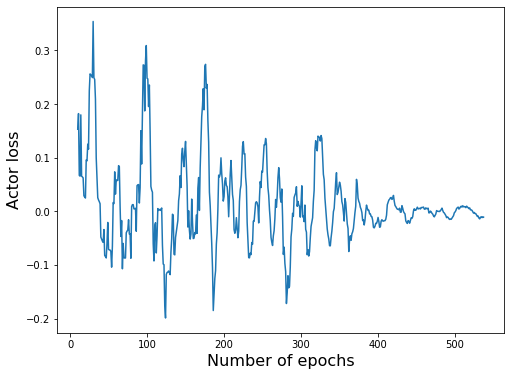

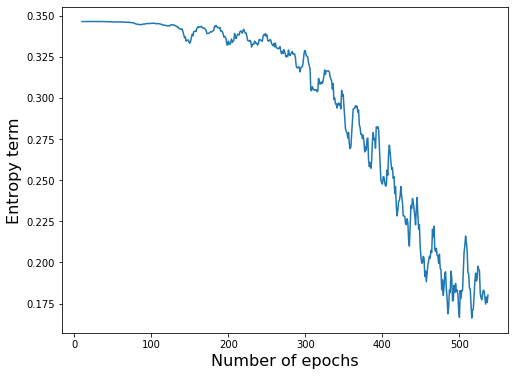

In [6]:
moving_average=True
average_window=10

if moving_average:
    n_epochs = np.arange(average_window, len(score))
else:
    n_epochs = np.arange(len(score))

### plot score ###
plt.figure(figsize=(8,6))

if moving_average:
    average_score = np.array([np.mean(score[i:i+average_window]) for i in range(len(n_epochs))])
    plt.plot(n_epochs, average_score)
else:
    plt.plot(n_epochs, score)
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Reward", fontsize=16)
plt.show()

### steps to solve ###
plt.figure(figsize=(8,6))

if moving_average:
    average_score = np.array([np.mean(steps_to_solve[i:i+average_window]) for i in range(len(n_epochs))])
    plt.plot(n_epochs, average_score)
else:
    plt.plot(n_epochs, steps_to_solve)
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Steps to solve", fontsize=16)
plt.show()

### plot critic loss ###
plt.figure(figsize=(8,6))

if moving_average:
    average_score = np.array([np.mean(losses['critic_losses'][i:i+average_window]) for i in range(len(n_epochs))])
    plt.plot(n_epochs, average_score)
else:
    plt.plot(n_epochs, losses['critic_losses'])

plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Critic loss", fontsize=16)
plt.show()

### plot actor loss ###
plt.figure(figsize=(8,6))

if moving_average:
    average_score = np.array([np.mean(losses['actor_losses'][i:i+average_window]) for i in range(len(n_epochs))])
    plt.plot(n_epochs, average_score)
else:
    plt.plot(n_epochs, losses['actor_losses'])

plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Actor loss", fontsize=16)
plt.show()

### plot entropy ###
plt.figure(figsize=(8,6))

if moving_average:
    average_score = np.array([np.mean(losses['entropies'][i:i+average_window]) for i in range(len(n_epochs))])
    plt.plot(n_epochs, -average_score)
else:
    plt.plot(n_epochs, -np.array(losses['entropies']))

plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("Entropy term", fontsize=16)
plt.show()

# Gated transformer architecture

### Shared vs Independent A2C

In [2]:
from Utils import utils, plot

In [26]:
load_dir = "Results/Sandbox/"
queries = ['gated','shared']
train_dict = utils.load_session(load_dir, queries)

Number of matching filenames: 1
 ['S_relational_gated_5by5_shared_A2C_11000-episodes_100-steps_VLOA.npy']


In [27]:
keywords = train_dict['keywords']
print("Keywords: ", keywords)
game_params = train_dict['game_params']
print("game_params: ", game_params)
HPs = train_dict['HPs']
print("HPs: ", HPs)
score1 = train_dict['score']
steps1 = train_dict['steps']
losses1 = train_dict['losses']    

Keywords:  ['relational', 'gated', '5by5', 'shared', 'A2C', '11000-episodes', '100-steps', 'VLOA']
game_params:  {'x': 5, 'y': 5, 'initial': [3, 4], 'goal': [0, 3], 'max_steps': 100, 'greyscale_state': True, 'return_ohe': True}
HPs:  {'gamma': 0.99, 'n_steps': 5, 'H': 0.001, 'n_kernels': 36, 'n_features': 256, 'n_heads': 1, 'n_attn_modules': 2, 'feature_hidden_dim': 16, 'feature_n_residuals': 1, 'device': 'cuda'}


In [28]:
load_dir = "Results/Sandbox/"
queries = ['gated','independent']
train_dict = utils.load_session(load_dir, queries)

Number of matching filenames: 1
 ['S_relational_gated_5by5_independent_A2C_11000-episodes_100-steps_ZGXL.npy']


In [29]:
keywords = train_dict['keywords']
print("Keywords: ", keywords)
game_params = train_dict['game_params']
print("game_params: ", game_params)
HPs = train_dict['HPs']
print("HPs: ", HPs)
score2 = train_dict['score']
steps2 = train_dict['steps']
losses2 = train_dict['losses']    

Keywords:  ['relational', 'gated', '5by5', 'independent', 'A2C', '11000-episodes', '100-steps', 'ZGXL']
game_params:  {'x': 5, 'y': 5, 'initial': [3, 0], 'goal': [2, 2], 'max_steps': 100, 'greyscale_state': True, 'return_ohe': True}
HPs:  {'gamma': 0.99, 'n_steps': 5, 'H': 0.001, 'n_kernels': 36, 'n_features': 256, 'n_heads': 1, 'n_attn_modules': 2, 'feature_hidden_dim': 16, 'feature_n_residuals': 1, 'device': 'cuda'}


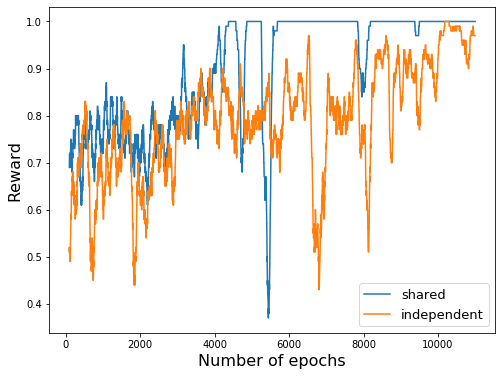

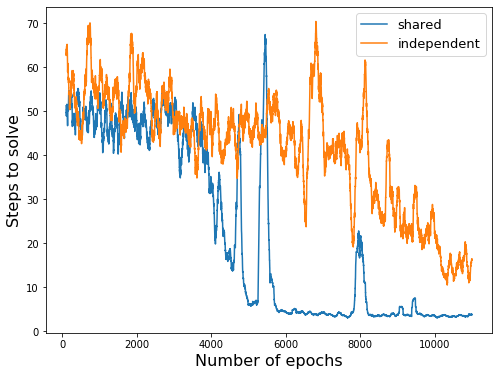

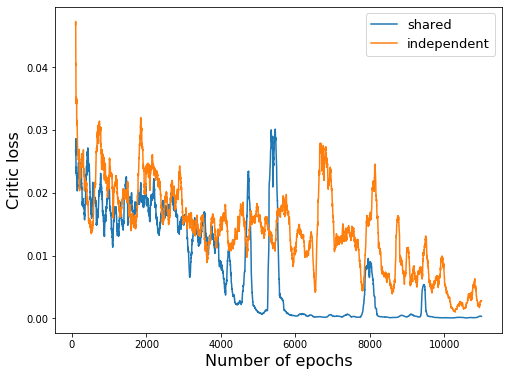

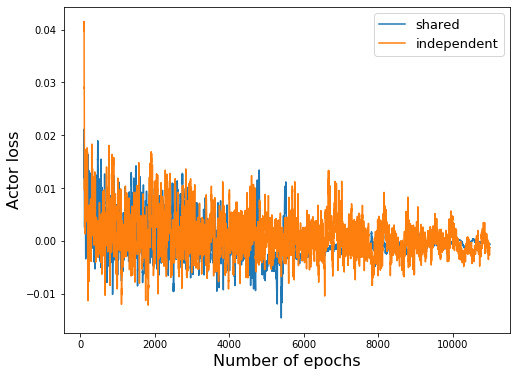

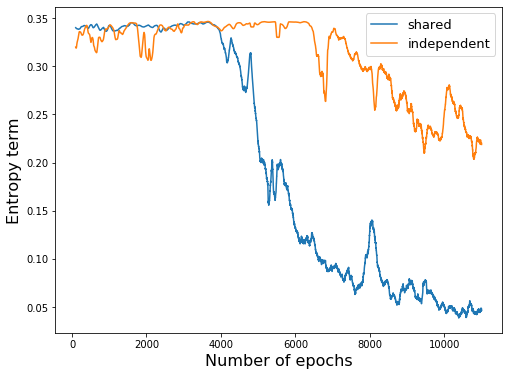

In [44]:
list_of_labels = ['shared', 'independent']
list_of_scores = [score1, score2]
list_of_steps = [steps1, steps2]
list_of_losses = [losses1, losses2]

plot.compare_sessions(list_of_scores, list_of_steps, list_of_losses, list_of_labels, average_window=100)

### A3C

In [46]:
load_dir = "Results/Sandbox/"
queries = ['gated','A3C','HTGN.npy'] #shared architecture
train_dict = utils.load_session(load_dir, queries)

Number of matching filenames: 1
 ['S_relational_gated_5by5_A3C_1088-episodes_100-steps_HTGN.npy']


In [18]:
keywords = train_dict['keywords']
print("Keywords: ", keywords)
game_params = train_dict['game_params']
print("game_params: ", game_params)
HPs = train_dict['HPs']
print("HPs: ", HPs)
score3 = train_dict['score']
steps3 = train_dict['steps']
losses3 = train_dict['losses']    

Keywords:  ['relational', 'gated', '5by5', 'A3C', '1088-episodes', '100-steps', 'HTGN']
game_params:  {'x': 5, 'y': 5, 'initial': [0, 0], 'goal': [4, 4], 'max_steps': 100, 'greyscale_state': True, 'return_ohe': True}
HPs:  {'gamma': 0.99, 'n_steps': 5, 'H': 0.001, 'n_kernels': 36, 'n_features': 256, 'n_heads': 1, 'n_attn_modules': 2, 'feature_hidden_dim': 16, 'feature_n_residuals': 1, 'device': 'cpu'}


In [42]:
# architecture used
A3C_agent = torch.load(load_dir+"agent_HTGN")
A3C_agent

SharedAC(
  (AC): SharedActorCritic_no_trg(
    (shared_architecture): GatedBoxWorldNet(
      (net): Sequential(
        (0): Convolution(
          (net): Sequential(
            (0): Conv2d(3, 18, kernel_size=(2, 2), stride=(1, 1))
            (1): ReLU()
            (2): Conv2d(18, 36, kernel_size=(2, 2), stride=(1, 1))
            (3): ReLU()
          )
        )
        (1): GatedRelationalModule(
          (net): Sequential(
            (0): PositionalEncoding(
              (projection): Linear(in_features=38, out_features=256, bias=True)
            )
            (1): GatedTransformerBlock(
              (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
              (dropout): Dropout(p=0, inplace=False)
              (attn): MultiheadAttention(
                (out_proj): Linear(in_features=256, out_features=256, bias=True)
              )
              (GRU_gate1): GRU_gating(
                (Wr): Linear(in_features=512, out_features=256, bias=False)
         

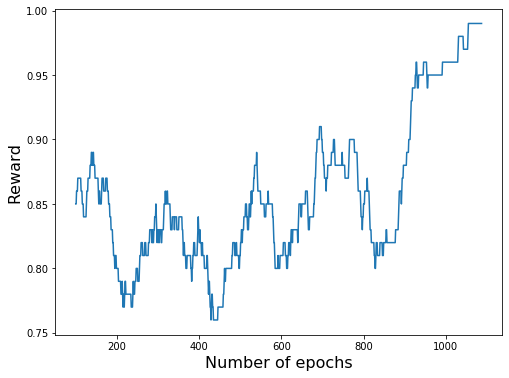

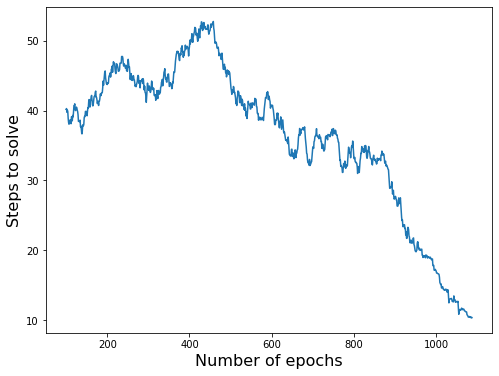

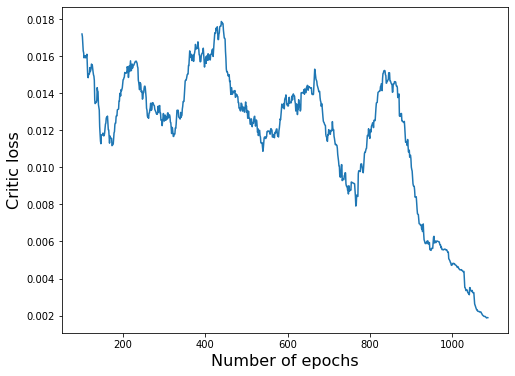

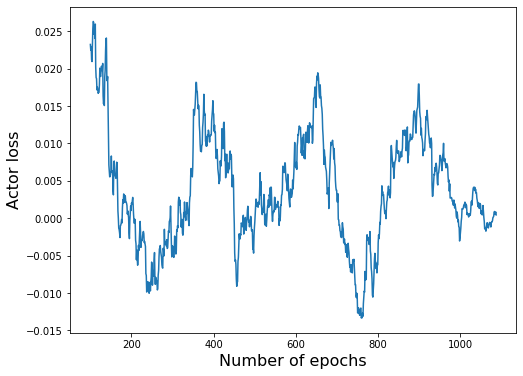

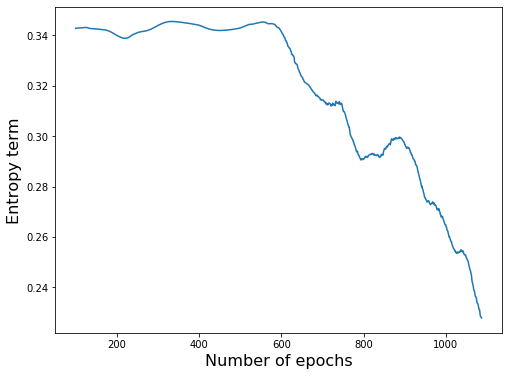

In [19]:
plot.plot_session(score3, steps3, losses3)

### Independent architecture

In [47]:
load_dir = "Results/Sandbox/"
queries = ['gated','A3C','independent'] 
train_dict = utils.load_session(load_dir, queries)

Number of matching filenames: 1
 ['S_relational_gated_5by5_independent_A3C_1088-episodes_100-steps_CEAD.npy']


In [48]:
keywords = train_dict['keywords']
print("Keywords: ", keywords)
game_params = train_dict['game_params']
print("game_params: ", game_params)
HPs = train_dict['HPs']
print("HPs: ", HPs)
score4 = train_dict['score']
steps4 = train_dict['steps']
losses4 = train_dict['losses']    

Keywords:  ['relational', 'gated', '5by5', 'independent', 'A3C', '1088-episodes', '100-steps', 'CEAD']
game_params:  {'x': 5, 'y': 5, 'initial': [0, 0], 'goal': [4, 4], 'max_steps': 100, 'greyscale_state': True, 'return_ohe': True}
HPs:  {'gamma': 0.99, 'n_steps': 5, 'H': 0.001, 'n_kernels': 36, 'n_features': 256, 'n_heads': 1, 'n_attn_modules': 2, 'feature_hidden_dim': 16, 'feature_n_residuals': 1, 'device': 'cpu'}


In [50]:
# architecture used
A3C_agent = torch.load(load_dir+"agent_CEAD")
A3C_agent

IndependentAC(
  (actor): Actor(
    (net): Sequential(
      (0): GatedBoxWorldNet(
        (net): Sequential(
          (0): Convolution(
            (net): Sequential(
              (0): Conv2d(3, 18, kernel_size=(2, 2), stride=(1, 1))
              (1): ReLU()
              (2): Conv2d(18, 36, kernel_size=(2, 2), stride=(1, 1))
              (3): ReLU()
            )
          )
          (1): GatedRelationalModule(
            (net): Sequential(
              (0): PositionalEncoding(
                (projection): Linear(in_features=38, out_features=256, bias=True)
              )
              (1): GatedTransformerBlock(
                (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
                (dropout): Dropout(p=0, inplace=False)
                (attn): MultiheadAttention(
                  (out_proj): Linear(in_features=256, out_features=256, bias=True)
                )
                (GRU_gate1): GRU_gating(
                  (Wr): Linear(in_features=512,

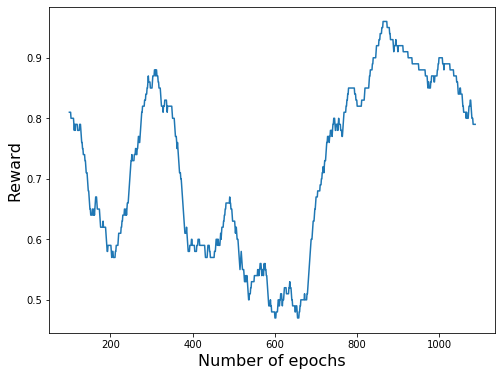

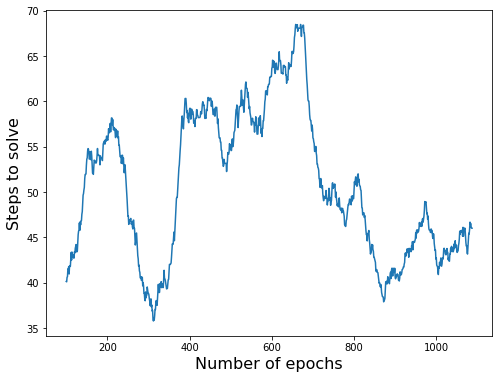

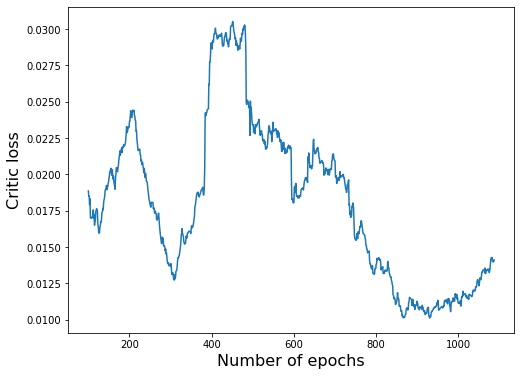

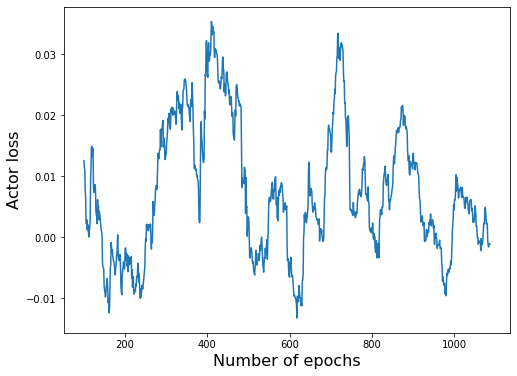

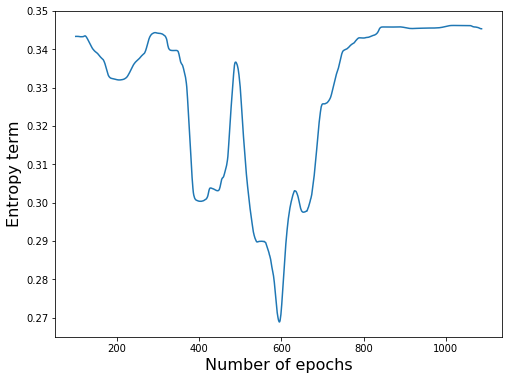

In [49]:
plot.plot_session(score4, steps4, losses4)

To compare the results we have to take into account the difference in testing: in A3C we are using 11 processes in parallel for training and 1 for testing, so every improvement from one testing episode to the next corresponds to 11 updates (on average, because there is no synchronization), whereas in the A2C we have a single process and we are recording the results of the training. One way to do a fair comparison is to decimate the A2C vectors.

In [24]:
def decimate_results(score, steps, losses, n=11):
    def dec_array(x, n):
        return np.array([x[i] for i in range(len(x)) if i%n==0 ])
    
    dec_score = dec_array(score, n)
    dec_steps = dec_array(steps, n)
    dec_losses = {}
    for k in losses.keys():
        dec_losses[k] = dec_array(losses[k], n)
        
    return dec_score, dec_steps, dec_losses

In [38]:
dec_score1, dec_steps1, dec_losses1 = decimate_results(score1, steps1, losses1)
dec_score2, dec_steps2, dec_losses2 = decimate_results(score2, steps2, losses2)

In [51]:
cut_losses3 = {}
for k in losses3:
    cut_losses3[k] = losses3[k][-1000:]
cut_losses4 = {}
for k in losses4:
    cut_losses4[k] = losses4[k][-1000:]

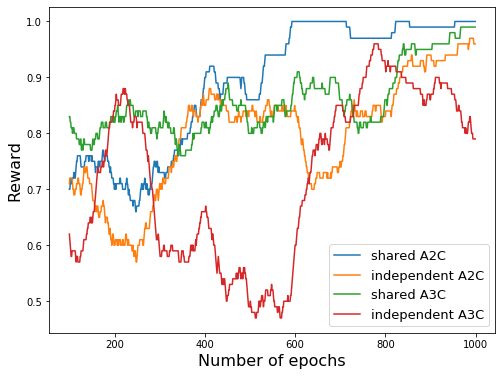

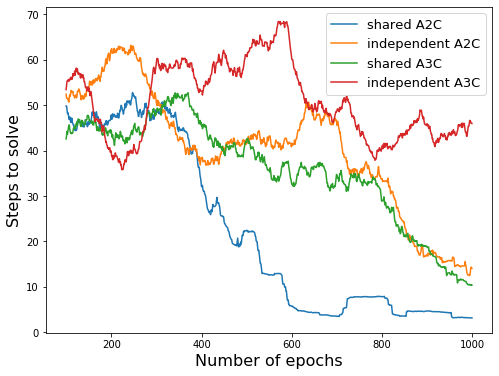

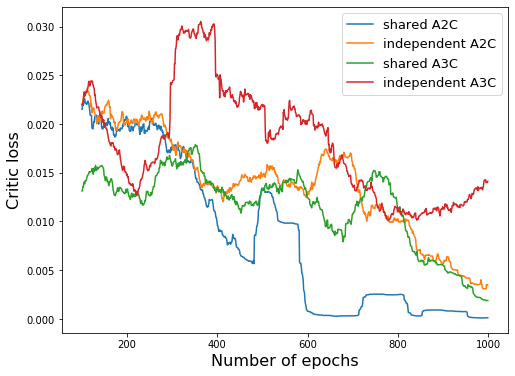

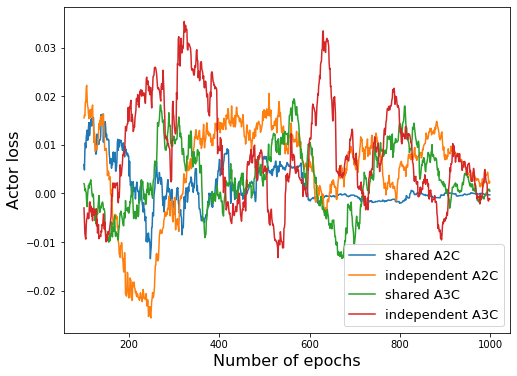

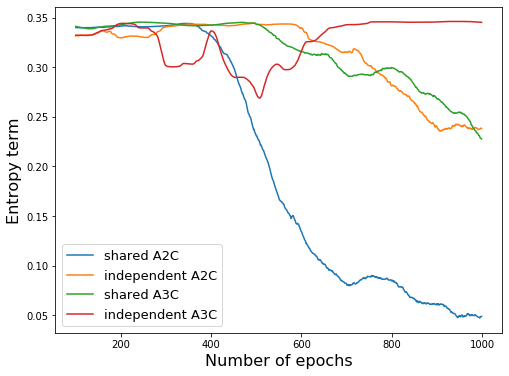

In [52]:
list_of_labels = ['shared A2C', 'independent A2C', 'shared A3C', 'independent A3C']
list_of_scores = [dec_score1, dec_score2, score3[-1000:], score4[-1000:]]
list_of_steps = [dec_steps1, dec_steps2, steps3[-1000:], steps4[-1000:]]
list_of_losses = [dec_losses1, dec_losses2, cut_losses3, cut_losses4]

plot.compare_sessions(list_of_scores, list_of_steps, list_of_losses, list_of_labels, average_window=100)

# Batched A2C

In [3]:
load_dir = "Results/Sandbox/"
queries = ['batched-A2C','shared']
train_dict = utils.load_session(load_dir, queries)

Number of matching filenames: 1
 ['S_batched-A2C_gated_5by5_shared_5000-episodes_100-steps_11-processes_ZNGG.npy']


In [4]:
keywords = train_dict['keywords']
print("Keywords: ", keywords)
game_params = train_dict['game_params']
print("game_params: ", game_params)
HPs = train_dict['HPs']
print("HPs: ", HPs)
score = train_dict['score']
steps = train_dict['steps']
losses = train_dict['losses']    

Keywords:  ['batched-A2C', 'gated', '5by5', 'shared', '5000-episodes', '100-steps', '11-processes', 'ZNGG']
game_params:  {'x': 5, 'y': 5, 'initial': [0, 0], 'goal': [4, 4], 'max_steps': 100, 'greyscale_state': True, 'return_ohe': True}
HPs:  {'gamma': 0.99, 'n_steps': 5, 'H': 0.001, 'n_kernels': 36, 'n_features': 256, 'n_heads': 1, 'n_attn_modules': 2, 'feature_hidden_dim': 16, 'feature_n_residuals': 1, 'device': 'cuda'}


### Raw results - different x scale

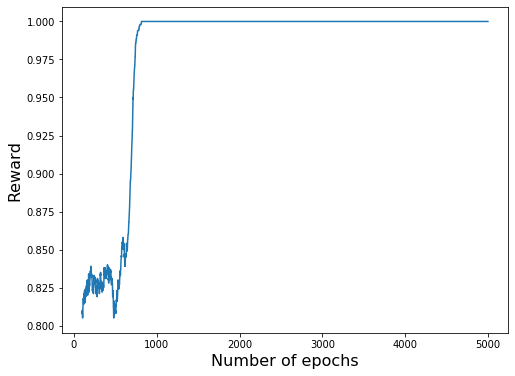

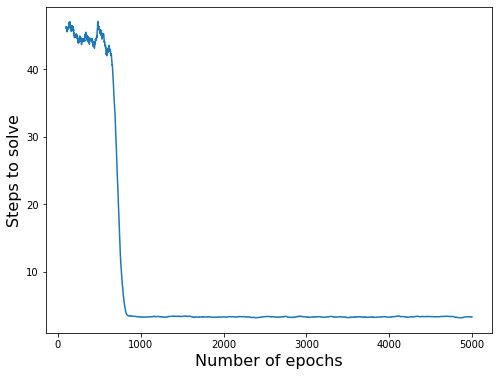

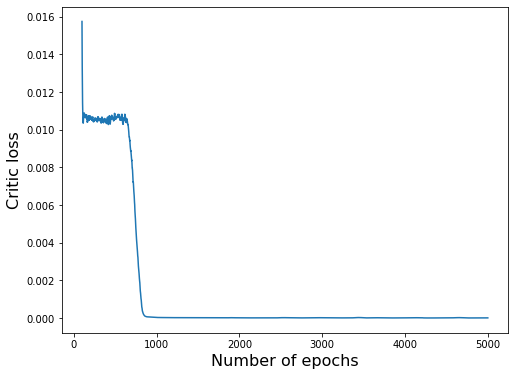

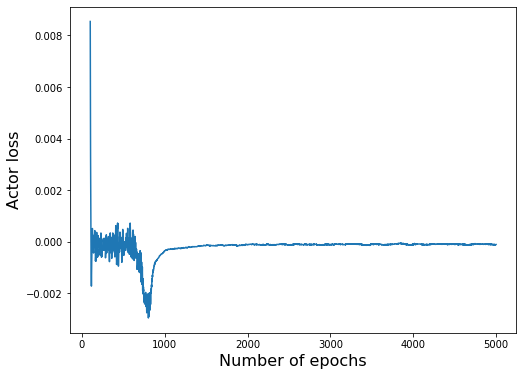

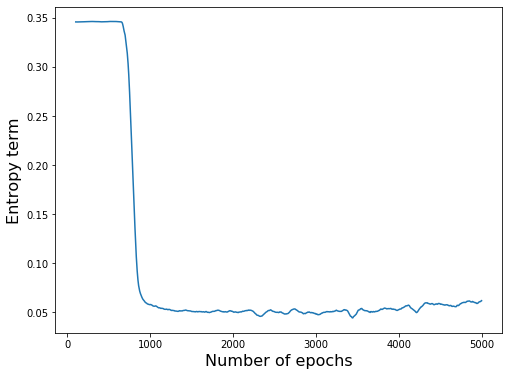

In [8]:
plot.plot_session(score, steps, losses)

**Overview of the batched A2C training:**
- 500000 parallel environment steps
- each parallel environment step consists of n-processes parallel steps 
- every 100 parallel steps make one update -> losses' data came from here
- every 100 parallel steps run 10 test episodes on a single enviroment -> score and steps' data came from here

CPU times: user 3h 14min 12s, sys: 7min 27s, total: 3h 21min 40s <br>
Wall time: 2h 1min 42s

It is a pure coincidence the fact that the two contain the same number of samples: for example in a 10 by 10 map I would use 200 parallel steps before making an update and maybe 1000 parallel steps before a test episode, so if I used the same amount of parallel environment steps I would get 2500 loss points and 500 score and steps points.

Also since the updates are made on n-processes more data (11 times more in this case) and the trajectories are always of 100 steps (instead of at most of 100 steps in all other algorithms), I found out that if we compare the algorithms in terms of optimization steps, the batched A2C is vastly superior to all others, but is not a fair comparison. 

To make it fair we could use the number of actual steps, as if they were taken sequentially instead of in parallel. But in that case we lack that knowledge in the case of the single-process A2C, even if we can actually retrieve it from the steps array; doing that however we'll not be able any more of taking the window average of the plots, because they will have different samplings in the x axis.

### Single A2C - shared architecture

In [11]:
load_dir = "Results/Sandbox/"
queries = ['gated','shared','11000-episodes']
train_dict = utils.load_session(load_dir, queries)

Number of matching filenames: 1
 ['S_relational_gated_5by5_shared_A2C_11000-episodes_100-steps_VLOA.npy']


In [12]:
keywords = train_dict['keywords']
print("Keywords: ", keywords)
game_params = train_dict['game_params']
print("game_params: ", game_params)
HPs = train_dict['HPs']
print("HPs: ", HPs)
score1 = train_dict['score']
steps1 = train_dict['steps']
losses1 = train_dict['losses']    

Keywords:  ['relational', 'gated', '5by5', 'shared', 'A2C', '11000-episodes', '100-steps', 'VLOA']
game_params:  {'x': 5, 'y': 5, 'initial': [3, 4], 'goal': [0, 3], 'max_steps': 100, 'greyscale_state': True, 'return_ohe': True}
HPs:  {'gamma': 0.99, 'n_steps': 5, 'H': 0.001, 'n_kernels': 36, 'n_features': 256, 'n_heads': 1, 'n_attn_modules': 2, 'feature_hidden_dim': 16, 'feature_n_residuals': 1, 'device': 'cuda'}


n_episodes:  2503


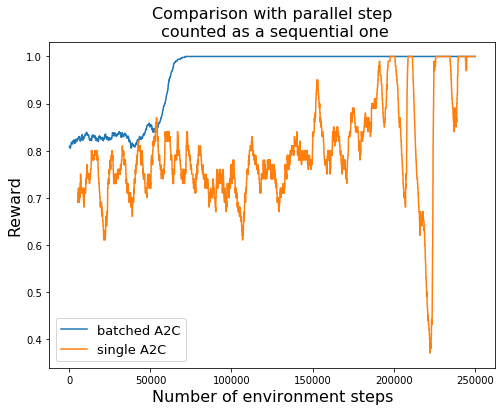

In [42]:
### plot score ###
average_window = 100

cum_steps1 = np.cumsum(steps1)[average_window:]
n_episodes = int(cum_steps1[-1]/100)
print("n_episodes: ", n_episodes)
cum_steps = np.arange(n_episodes)*100

plt.figure(figsize=(8,6))

tmp_score = score[:n_episodes]
average_score = np.array([np.mean(tmp_score[i:i+average_window]) for i in range(len(cum_steps))])
plt.plot(cum_steps, average_score, label='batched A2C')
average_score1 = np.array([np.mean(score1[i:i+average_window]) for i in range(len(cum_steps1))])
plt.plot(cum_steps1, average_score1, label='single A2C')

plt.title("Comparison with parallel step\n counted as a sequential one", fontsize = 16)
plt.xlabel("Number of environment steps", fontsize=16)
plt.ylabel("Reward", fontsize=16)
plt.legend(fontsize=13)
plt.show()

So to get a similar plot for the batched A2C we have to consider that each test point is sampled after exactly 1100 sequential environment steps, so to stop at 250.000 we need to consider only the first 227 samples.

/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


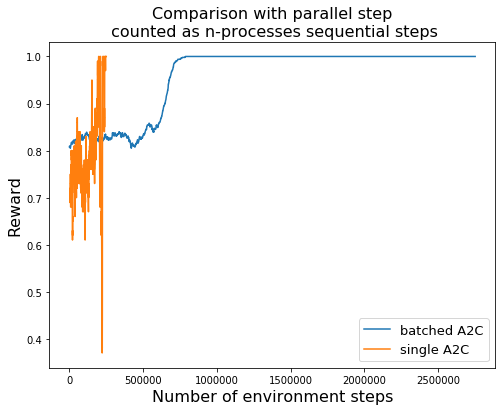

In [43]:
### plot score ###
average_window = 100

cum_steps1 = np.cumsum(steps1)[average_window:]
cum_steps = np.arange(len(steps))*1100

plt.figure(figsize=(8,6))

tmp_score = score[:n_episodes]
average_score = np.array([np.mean(tmp_score[i:i+average_window]) for i in range(len(cum_steps))])
plt.plot(cum_steps, average_score, label='batched A2C')
average_score1 = np.array([np.mean(score1[i:i+average_window]) for i in range(len(cum_steps1))])
plt.plot(cum_steps1, average_score1, label='single A2C')

plt.title("Comparison with parallel step\n counted as n-processes sequential steps", fontsize = 16)
plt.xlabel("Number of environment steps", fontsize=16)
plt.ylabel("Reward", fontsize=16)
plt.legend(fontsize=13)
plt.show()

Finally if we look from the point of view of the optimization steps, we have that in this particular case in the batched A2C we sampled after every update, whereas in the single A2C we are registering data from training, so we store data about each update. In conclusion we don't need to scale the data in that case.

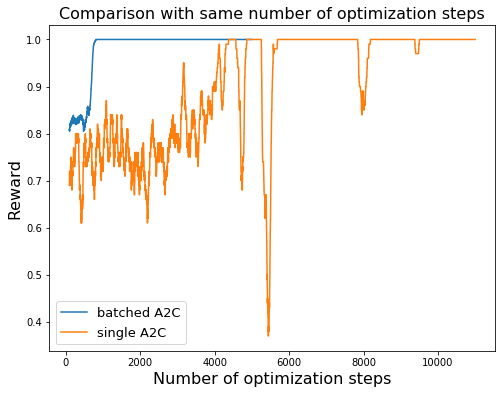

In [44]:
### plot score ###
average_window = 100

n_episodes = np.arange(average_window, len(score))
n_episodes1 = np.arange(average_window, len(score1))

plt.figure(figsize=(8,6))

average_score = np.array([np.mean(score[i:i+average_window]) for i in range(len(n_episodes))])
plt.plot(n_episodes, average_score, label='batched A2C')
average_score1 = np.array([np.mean(score1[i:i+average_window]) for i in range(len(n_episodes1))])
plt.plot(n_episodes1, average_score1, label='single A2C')

plt.title("Comparison with same number of optimization steps", fontsize = 16)
plt.xlabel("Number of optimization steps", fontsize=16)
plt.ylabel("Reward", fontsize=16)
plt.legend(fontsize=13)
plt.show()

I would like to make a comparison in terms of speed of the two algorithms, but it's really difficult as long as the single-process version works on episodes instead of steps, since the former ones are of variable length. Also I suspect that the batched version has a more or less constant frequency of updates, whereas the single-process version in the end will increase the frequency of updates but diminish the number of steps used for each update even more.

One study that is easier to do is to vary the number of processes used by the batched A2C.